In [1]:
import cv2 
import matplotlib.pyplot as plt

In [2]:
def display(img):
    figure = plt.figure(figsize=[15,10])
    ax = figure.add_subplot(111)
    ax.imshow(img, cmap='gray')

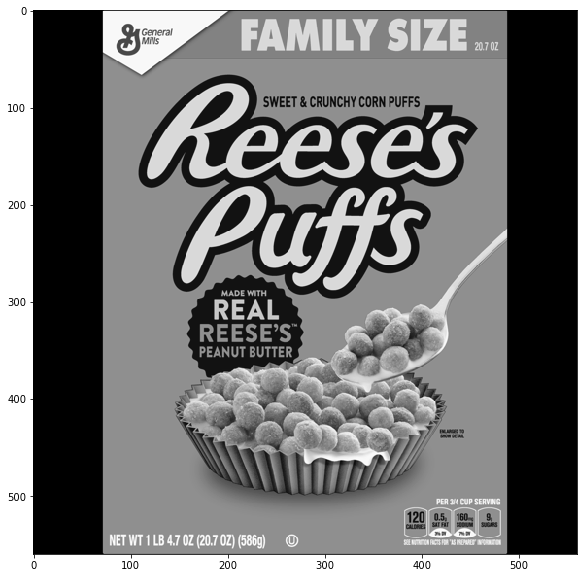

In [3]:
reeses = cv2.imread('DATA/reeses_puffs.png',0)
display(reeses)

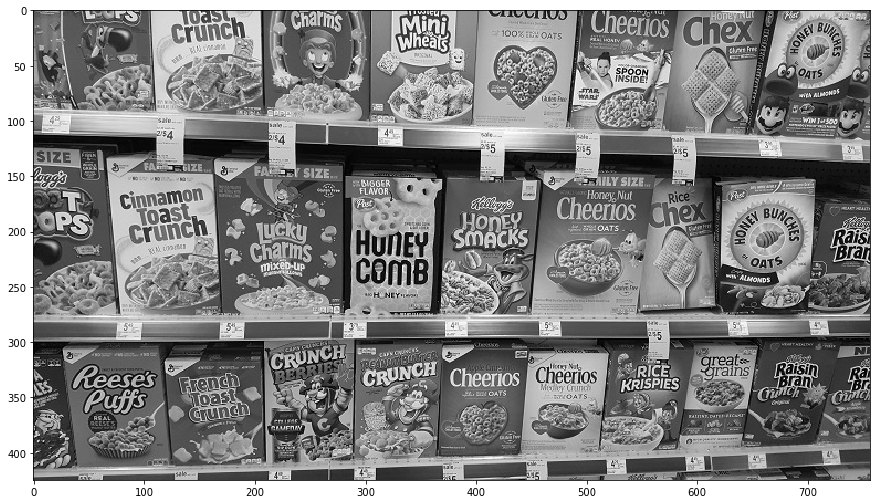

In [26]:
target_image =cv2.imread('DATA/many_cereals.jpg',0)
display(target_image)

In [18]:
## Brute force with orb detector
## 1 step create orb detector object
orb = cv2.ORB_create()

In [19]:
## 2 step make detection using detector object 
kp1,dec1 = orb.detectAndCompute(reeses,None)
kp2,dec2 = orb.detectAndCompute(target_image,None)

In [20]:
## 3 step create brute force object
bf = cv2.BFMatcher(cv2.NORM_HAMMING)

In [21]:
## 4 step create matches by comparing descriptors
matches = bf.match(dec1,dec2)
## optinal sorting them to get most best in top order
matches = sorted(matches,key=lambda x:x.distance)

In [22]:
## 5 draw matches on images
output = cv2.drawMatches(reeses,kp1,target_image,kp2,matches[:30],None,flags=2)

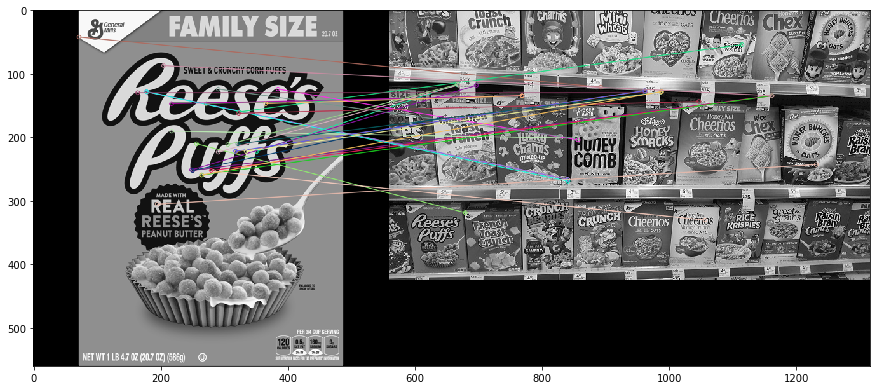

In [27]:
display(output)

In [36]:
## brute force with sift
## 1 step create sift detector object
sift = cv2.SIFT_create()

In [37]:
## 2 step make detection using detector object 
key_point1,descriptors1 = sift.detectAndCompute(reeses,None)
key_point2,descriptors2 = sift.detectAndCompute(target_image,None)

In [54]:
## 3 step create brute force object
bf = cv2.BFMatcher()

In [55]:
## 4 step create matches by comparing descriptors here use knn match
matches = bf.knnMatch(descriptors1,descriptors2,k=2)

In [56]:
# Apply ratio test
good = []
for match1,match2 in matches:
    if match1.distance <= 0.75*match2.distance:
        good.append([match1])

In [59]:
## 5 draw matches on images
output2 = cv2.drawMatchesKnn(reeses,key_point1,target_image,key_point2,good,None,flags=2)

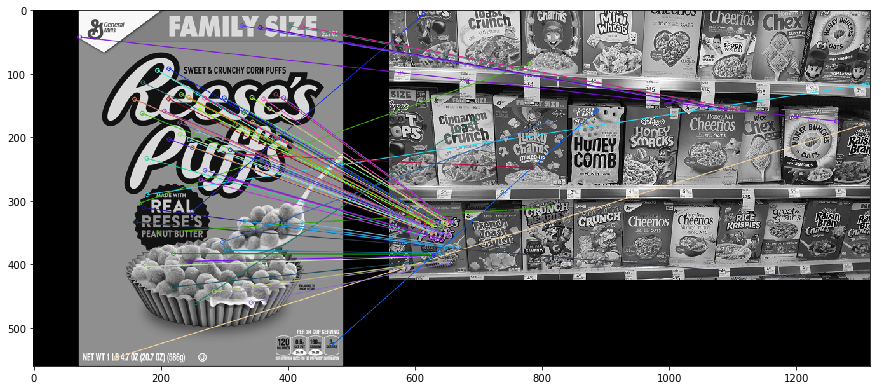

In [60]:
display(output2)

In [45]:
## FLann matcher
## 1 step create sift detector object
sift = cv2.SIFT_create()

In [46]:
## 2 step make detection using detector object 
key_p1,descrip1 = sift.detectAndCompute(reeses,None)
key_p2,descrip2 = sift.detectAndCompute(target_image,None)

In [48]:
## create default parameters for flann matcher
FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50)

In [50]:
## 3 step create Flann matcher object
flann = cv2.FlannBasedMatcher(index_params,search_params)
## 4 step create matches by comparing descriptors here use knn match
matches = flann.knnMatch(descrip1,descrip2,k=2)

In [67]:
# Need to draw only good matches, so create a mask
matchesMask = [[0,0] for i in range(len(matches))]

# ratio test as per Lowe's paper
for i,(m,n) in enumerate(matches):
    if m.distance < 0.7*n.distance:
        matchesMask[i]=[1,0]

draw_params = dict(matchColor = (0,255,0),
                   singlePointColor = (255,0,0),
                   matchesMask = matchesMask,
                   flags = 0)

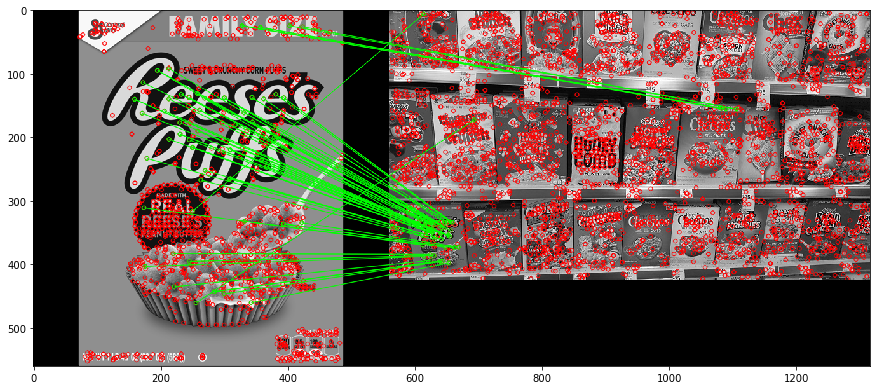

In [69]:
img = cv2.drawMatchesKnn(reeses,key_p1,target_image,key_p2,matches,None,**draw_params)
display(img)